In [1054]:
import pandas as pd
from sklearn.cluster import KMeans
import datetime
import seaborn as sns
import numpy as np

In [1055]:
food_df = pd.read_csv("food.csv")
orders_df = pd.read_csv("orders.csv")
menu_df = pd.read_csv("menu.csv", low_memory=False)
restaurant_df = pd.read_csv("restaurant.csv")
users_df_main = pd.read_csv("users.csv")

# 1.0 Read Segmentation DF

In [1056]:
segmentation_df = pd.read_csv("kmeans_df2.csv")
segmentation_df

,Unnamed: 0,user_id,frequency,monetary_value,recency,recency_score,frequency_score,monetary_score,rfm_score,rfm_level,customer_segment,predicted_clusters,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,k_proto_segment
0,0,1,2,1672.00,590,2,2,3,223,7,need_attention,1,20,Female,Single,Student,No Income,Post Graduate,4,0
1,1,2,3,4061.00,693,1,3,4,134,8,promising,1,24,Female,Single,Student,Below Rs.10000,Graduate,3,0
2,2,3,1,1206.53,408,2,1,2,212,5,hibernating,0,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,1
3,3,4,1,102.00,506,2,1,1,211,4,hibernating,0,22,Female,Single,Student,No Income,Graduate,6,1
4,4,5,2,2758.51,702,1,2,3,123,6,need_attention,1,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77579,77579,99995,2,1454.00,235,3,2,3,323,8,promising,1,30,Male,Married,Employee,More than 50000,Graduate,5,2
77580,77580,99996,2,1898.00,15,4,2,3,423,9,promising,1,23,Female,Prefer not to say,Employee,10001 to 25000,Graduate,4,0
77581,77581,99997,4,7908.00,8,4,4,4,444,12,champion,1,19,Male,Single,Student,No Income,Graduate,6,0
77582,77582,99998,2,2417.65,268,3,2,3,323,8,promising,1,21,Female,Single,Student,No Income,Graduate,2,0


## 1.1 Average RFM of each segment

In [1057]:
segmentation_df[["k_proto_segment", "monetary_value", "recency", "frequency"]].groupby("k_proto_segment", as_index = False).mean()

,k_proto_segment,monetary_value,recency,frequency
0,0,3441.244048,273.425428,2.669290
1,1,891.512479,575.495295,1.131819
2,2,2096.759958,406.525898,1.860626


In [1058]:
segmentation_df["cluster"] = segmentation_df["k_proto_segment"]#segmentation_df["customer_segment"].apply(lambda x: segment_dict[x])
selected_cluster_num = len(segmentation_df["cluster"].unique())
segmentation_df = segmentation_df[["user_id", "cluster", "frequency", "monetary_value",  "recency"]]

In [1059]:
users_df = users_df_main[["user_id", "Age", "Gender", "Marital Status", "Occupation", "Monthly Income", "Educational Qualifications"]]
user_df_segmentation = pd.get_dummies(users_df, columns=['Gender', "Marital Status", "Occupation", "Monthly Income", "Educational Qualifications"], drop_first=True)

In [1060]:
user_df_segmentation = user_df_segmentation.merge(segmentation_df, how = "left", on = "user_id")
user_df_segmentation = user_df_segmentation[~user_df_segmentation["cluster"].isna()]
user_df_segmentation["segment"] = user_df_segmentation["cluster"].apply(int)
user_df_segmentation = user_df_segmentation.drop(["cluster","user_id"], axis = 1)

In [1061]:
user_df_segmentation

,Age,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,frequency,monetary_value,recency,segment
0,20,0,0,1,0,0,1,0,0,0,1,0,1,0,0,2.0,1672.00,590.0,0
1,24,0,0,1,0,0,1,0,1,0,0,0,0,0,0,3.0,4061.00,693.0,0
2,22,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1.0,1206.53,408.0,1
3,22,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1.0,102.00,506.0,1
4,22,1,0,1,0,0,1,0,1,0,0,0,1,0,0,2.0,2758.51,702.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,30,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,1454.00,235.0,2
99995,23,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1898.00,15.0,0
99996,19,1,0,1,0,0,1,0,0,0,1,0,0,0,0,4.0,7908.00,8.0,0
99997,21,0,0,1,0,0,1,0,0,0,1,0,0,0,0,2.0,2417.65,268.0,0


In [1062]:
result = []
for seg in user_df_segmentation["segment"].unique():
    temp_df = user_df_segmentation[user_df_segmentation.segment == seg].copy()
    age = temp_df[["segment", "Age"]].groupby(["segment"], as_index = False).mean()["Age"]
    temp_df = temp_df.groupby(["segment"], as_index = False).sum()
    temp_df["Age"] = age
    result.append(temp_df)

In [1063]:
output = pd.concat(result).sort_values(by = "segment")
output

,segment,Age,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,frequency,monetary_value,recency
0,0,23.525592,17907.0,970.0,26794.0,66.0,3402.0,21377.0,4258.0,2301.0,2989.0,18465.0,1302.0,16852.0,489.0,5.0,84798.0,1.093214e+08,8686179.0
0,1,23.576991,16506.0,861.0,24636.0,52.0,3290.0,19477.0,4016.0,2036.0,2799.0,16800.0,1198.0,15450.0,434.0,7.0,33194.0,2.614628e+07,16878126.0
0,2,28.634583,9971.0,555.0,2104.0,1672.0,4118.0,538.0,5521.0,679.0,6609.0,2121.0,2131.0,2388.0,1478.0,385.0,30678.0,3.457138e+07,6702799.0


# 2.0 Count unique orders by each segment(Demand)

In [1064]:
pd.qcut(user_df_segmentation['Age'], 3, labels=False)

0        0
1        1
2        0
3        0
4        0
        ..
99994    2
99995    0
99996    0
99997    0
99998    0
Name: Age, Length: 77584, dtype: int64

In [1065]:
user_df_segmentation["Age"] = pd.qcut(user_df_segmentation['Age'], 3, labels=False)

In [1066]:
users_df["segment"] = user_df_segmentation["segment"]
users_df["user_id"] = users_df_main["user_id"]

/var/folders/l5/6__vfzh169x_xzxxk3jfz6th0000gn/T/ipykernel_61727/196124704.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df["segment"] = user_df_segmentation["segment"]
/var/folders/l5/6__vfzh169x_xzxxk3jfz6th0000gn/T/ipykernel_61727/196124704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  users_df["user_id"] = users_df_main["user_id"]


In [1067]:
users_df
user_segments = dict(zip(users_df.user_id.to_list(), users_df.segment.to_list()))

In [1068]:
orders_df["user_segment"] = orders_df.user_id.apply(lambda x: user_segments[x])

In [1069]:
def month_diff(end_date, st_date):
    return (end_date.year - st_date.year) * 12 + (end_date.month - st_date.month)

In [1070]:
orders_df["month_number"] = pd.DatetimeIndex(orders_df.order_date).to_series().apply(lambda x: month_diff(x, datetime.datetime(2017,1,1))).to_frame().reset_index(drop = True)["order_date"]

In [1071]:
orders_df

,Unnamed: 0,order_date,sales_qty,sales_amount,currency,user_id,r_id,user_segment,month_number
0,0,2017-10-10,100,41241,INR,49226,567335.0,2.0,9
1,1,2018-05-08,3,-1,INR,77359,531342.0,0.0,16
2,2,2018-04-06,1,875,INR,5321,158203.0,0.0,15
3,3,2018-04-11,1,583,INR,21343,187912.0,1.0,15
4,4,2018-06-18,6,7176,INR,75378,543530.0,2.0,17
...,...,...,...,...,...,...,...,...,...
150276,150276,2019-04-18,1,394,INR\r,79856,NaN,2.0,27
150277,150277,2019-04-23,1,667,INR\r,65798,NaN,1.0,27
150278,150278,2019-04-23,1,625,INR\r,49176,NaN,2.0,27
150279,150279,2019-04-24,7,8625,INR\r,87924,NaN,2.0,27


In [1072]:
retention_df = orders_df[["user_segment", "month_number", "user_id"]].groupby(["user_segment", "month_number"], as_index = False).agg(
    {"user_id": pd.Series.nunique})


Text(0, 0.5, 'Count of unique orders')

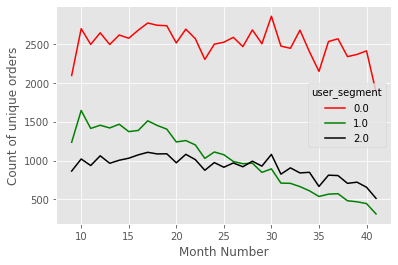

In [1073]:
retention_df = retention_df.sort_values(by = ["user_segment", "month_number"])
palette = ["red", "green", "black", "pink", "gray", "yellow"][:selected_cluster_num]
p = sns.lineplot(x='month_number', y='user_id', data=retention_df, hue='user_segment', palette=palette)
p.set_xlabel("Month Number")
p.set_ylabel("Count of unique orders")

# 3.0 Find retention rate of each segment

In [1074]:
segment_analysis = []
segment_analysis_df = orders_df[["user_id", "user_segment", "month_number"]]
columns = ["churned", "new", "active"]
for segment in segment_analysis_df["user_segment"].unique():
    temp_df = segment_analysis_df[segment_analysis_df["user_segment"] == segment]
    temp_df = temp_df.sort_values(by = ["month_number"])
    temp_result = {}
    result_df = []
    for user_id, month_number in zip(temp_df["user_id"].to_list(), temp_df["month_number"].to_list()):
        if month_number not in temp_result:
            temp_result[month_number] = dict(zip(columns, [0 for x in columns]))
        if month_number + 1 not in temp_result:
            temp_result[month_number + 1] = dict(zip(columns, [0 for x in columns]))
        if month_number - 1 not in temp_result:
            temp_result[month_number - 1] = dict(zip(columns, [0 for x in columns]))
            
        if len(temp_df[(temp_df["user_id"] == user_id) & (temp_df["month_number"] == month_number - 1)]) > 0:
            temp_result[month_number]["active"] += 1
        else:
            temp_result[month_number]["new"] += 1
        if len(temp_df[(temp_df["user_id"] == user_id) & (temp_df["month_number"] == month_number + 1)]) == 0:
            temp_result[month_number + 1]["churned"] += 1
    for month, values in temp_result.items():
        result_df.append([month] + list(values.values()) + [segment])
    segment_analysis.append(result_df)
    
            
            
            

In [1075]:
analysis_df = pd.concat([pd.DataFrame(s) for s in segment_analysis])
analysis_df.columns = ["month", "churned", "new", "active", "segment"]
analysis_df["retention"] = analysis_df["active"] * 100/(analysis_df["churned"] + analysis_df["active"])
analysis_df = analysis_df.reset_index()

In [1076]:
analysis_df.head(20).sort_values(by = "month")

,index,month,churned,new,active,segment,retention
2,2,8,0,0,0,2.0,NaN
0,0,9,0,877,0,2.0,NaN
1,1,10,835,1006,44,2.0,5.005688
3,3,11,999,910,50,2.0,4.766444
4,4,12,905,1030,55,2.0,5.729167
5,5,13,1040,953,46,2.0,4.235727
6,6,14,950,985,46,2.0,4.618474
7,7,15,973,997,57,2.0,5.533981
8,8,16,1009,1060,44,2.0,4.178538
9,9,17,1058,1100,47,2.0,4.253394


<AxesSubplot:xlabel='month', ylabel='new'>

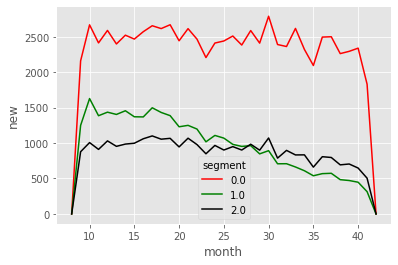

In [1077]:
sns.lineplot(x = "month", y = "new", hue = "segment", data = analysis_df, palette=palette[:selected_cluster_num])

Text(0, 0.5, 'Retention Rate by Segment')

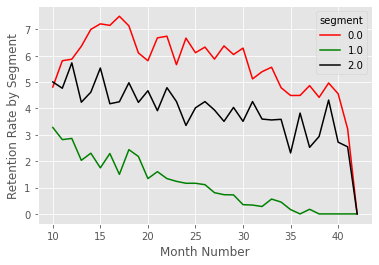

In [1078]:
palette = ["red", "green", "black", "pink", "gray", "yellow"]
p = sns.lineplot(x='month', y='retention', data=analysis_df, hue='segment', palette=palette[:selected_cluster_num])
p.set_xlabel("Month Number")
p.set_ylabel("Retention Rate by Segment")

In [1079]:
analysis_df

,index,month,churned,new,active,segment,retention
0,0,9,0,877,0,2.0,NaN
1,1,10,835,1006,44,2.0,5.005688
2,2,8,0,0,0,2.0,NaN
3,3,11,999,910,50,2.0,4.766444
4,4,12,905,1030,55,2.0,5.729167
...,...,...,...,...,...,...,...
100,30,38,574,483,0,1.0,0.000000
101,31,39,483,471,0,1.0,0.000000
102,32,40,471,447,0,1.0,0.000000
103,33,41,447,314,0,1.0,0.000000


In [1080]:
orders_df

,Unnamed: 0,order_date,sales_qty,sales_amount,currency,user_id,r_id,user_segment,month_number
0,0,2017-10-10,100,41241,INR,49226,567335.0,2.0,9
1,1,2018-05-08,3,-1,INR,77359,531342.0,0.0,16
2,2,2018-04-06,1,875,INR,5321,158203.0,0.0,15
3,3,2018-04-11,1,583,INR,21343,187912.0,1.0,15
4,4,2018-06-18,6,7176,INR,75378,543530.0,2.0,17
...,...,...,...,...,...,...,...,...,...
150276,150276,2019-04-18,1,394,INR\r,79856,NaN,2.0,27
150277,150277,2019-04-23,1,667,INR\r,65798,NaN,1.0,27
150278,150278,2019-04-23,1,625,INR\r,49176,NaN,2.0,27
150279,150279,2019-04-24,7,8625,INR\r,87924,NaN,2.0,27


## 4.0 Use classification model to find the most representative feature of each segment

In [1081]:
user_df_segmentation

,Age,Gender_Male,Marital Status_Prefer not to say,Marital Status_Single,Occupation_House wife,Occupation_Self Employeed,Occupation_Student,Monthly Income_25001 to 50000,Monthly Income_Below Rs.10000,Monthly Income_More than 50000,Monthly Income_No Income,Educational Qualifications_Ph.D,Educational Qualifications_Post Graduate,Educational Qualifications_School,Educational Qualifications_Uneducated,frequency,monetary_value,recency,segment
0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,2.0,1672.00,590.0,0
1,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,3.0,4061.00,693.0,0
2,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1.0,1206.53,408.0,1
3,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1.0,102.00,506.0,1
4,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,2.0,2758.51,702.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,2,1,0,0,0,0,0,0,0,1,0,0,0,0,0,2.0,1454.00,235.0,2
99995,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2.0,1898.00,15.0,0
99996,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,4.0,7908.00,8.0,0
99997,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,2.0,2417.65,268.0,0


In [1082]:

from sklearn.linear_model import LogisticRegression
import random


X, y = user_df_segmentation.drop(["segment"], axis = 1), user_df_segmentation["segment"]
#y = y.apply(lambda x: random.randint(0, 3))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
# Create the logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000)

# Fit the model on the dataset
logreg.fit(X_train, y_train)

# Predict the classes for new data
predicted_classes = logreg.predict(X_test)

In [1083]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predicted_classes)

0.8894116130695366

<AxesSubplot:>

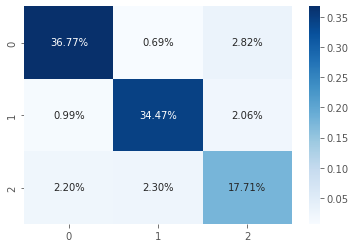

In [1084]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cf_matrix = confusion_matrix(y_test, predicted_classes)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

In [1085]:
cf_matrix_new = []
for x in cf_matrix:
    result = []
    for y in x:
        result.append(y/sum(x))
    cf_matrix_new.append(result)

<AxesSubplot:>

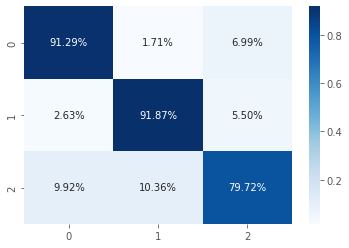

In [1086]:
sns.heatmap(cf_matrix_new, annot=True, 
            fmt='.2%', cmap='Blues')

In [1087]:
result_df = dict(zip([0, 1, 2], logreg.coef_))
segment = []
coef = []
column_name = []
result = {}
result["feature"] = X.columns
for k, v in result_df.items():
    result[f"segment {k}"] = v
logreg_feature_importance = pd.DataFrame(result)

## 4.1 Run the same model using statsmodel to find p-value and coefficient

In [1092]:
import statsmodels.api as sm

X, y = user_df_segmentation.drop(["segment"], axis = 1), user_df_segmentation["segment"]
X = sm.add_constant(X) # Add intercept column
model = sm.MNLogit(y, X)
result = model.fit()

print(result.summary())


Optimization terminated successfully.
         Current function value: 0.268526
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:                segment   No. Observations:                77584
Model:                        MNLogit   Df Residuals:                    77546
Method:                           MLE   Df Model:                           36
Date:                Sun, 16 Apr 2023   Pseudo R-squ.:                  0.7473
Time:                        17:36:53   Log-Likelihood:                -20833.
converged:                       True   LL-Null:                       -82432.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                               segment=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------
const                                        6.6